Okey
Aqui vamos a comparar los mpm
Porque como esta en el apunte de resumen, cada uno tiene sus caracteristicas y puede que si no necesitas tanta potencia o realmente no manejas una carga grande en el servidor, pues sea mejor uno que otro

Aqui vamos a probar el event vs el prefork

In [ ]:
sudo ab -n 1000000 -c 500 http://localhost/

Este comando se utiliza para realizar una **prueba de carga** (stress test) o un **benchmarking** a un servidor web. Específicamente, estás usando la herramienta **Apache Benchmark (`ab`)**.

Aquí tienes el desglose detallado de cada parte del comando:

### Desglose del comando

* **`sudo`**: Ejecuta el comando con privilegios de superusuario. Aunque `ab` no siempre lo requiere, se usa a veces para permitir que el sistema abra una gran cantidad de "sockets" o conexiones simultáneas que podrían estar limitadas para un usuario normal.
* **`ab`**: Es el ejecutable de **Apache Benchmark**, una herramienta de línea de comandos diseñada para medir el rendimiento de servidores HTTP (especialmente cuántas solicitudes por segundo puede manejar).
* **`-n 1000000`**: Define el **número total de solicitudes** (requests) a realizar. En este caso, le estás pidiendo que envíe **1 millón** de solicitudes en total.
* **`-c 500`**: Define el nivel de **concurrencia**. Esto significa que el comando intentará realizar **500 solicitudes al mismo tiempo** (simultáneamente) hasta completar el millón total.
* **`http://localhost/`**: Es la URL del objetivo. En este caso, estás atacando/probando el servidor web que corre en tu propia máquina.

---

### ¿Qué está pasando a nivel técnico?

Imagina que tienes una puerta (el servidor) y quieres ver cuánta gente puede pasar por ella antes de que se bloquee. Con `-c 500` estás enviando a 500 personas a la vez en oleadas constantes hasta que un millón de personas hayan pasado.

### Consideraciones importantes

1. **Es una prueba pesada**: Enviar 1,000,000 de solicitudes con una concurrencia de 500 es una carga considerable. Si tu servidor (como Apache o Nginx) no está optimizado, es muy probable que:
* El uso de CPU suba al 100%.
* Te quedes sin memoria RAM.
* Empieces a ver errores de "Connection refused" o "Gateway Timeout".


2. **Límites del Sistema Operativo**: Muchos sistemas (como Linux o macOS) tienen un límite de "archivos abiertos" (`ulimit`). Si intentas abrir 500 conexiones simultáneas y el límite es menor, el comando fallará.
3. **No lo uses contra sitios ajenos**: Ejecutar este comando contra una página web que no te pertenece puede ser considerado un **ataque de Denegación de Servicio (DoS)** y es ilegal en muchas jurisdicciones.

### ¿Qué resultados obtendrás?

Al terminar, `ab` te entregará un informe con:

* **Requests per second**: Cuántas solicitudes logró procesar el servidor por segundo (el dato más importante).
* **Time per request**: Cuánto tardó, en promedio, en responder cada solicitud.
* **Percentage of the requests served within a certain time**: Una tabla que muestra el tiempo de respuesta para el 50%, 90%, 95%, etc.




Bueno esto es cortecia de gemini
lo explica bien y ahora justo vamos a ver los resultados 

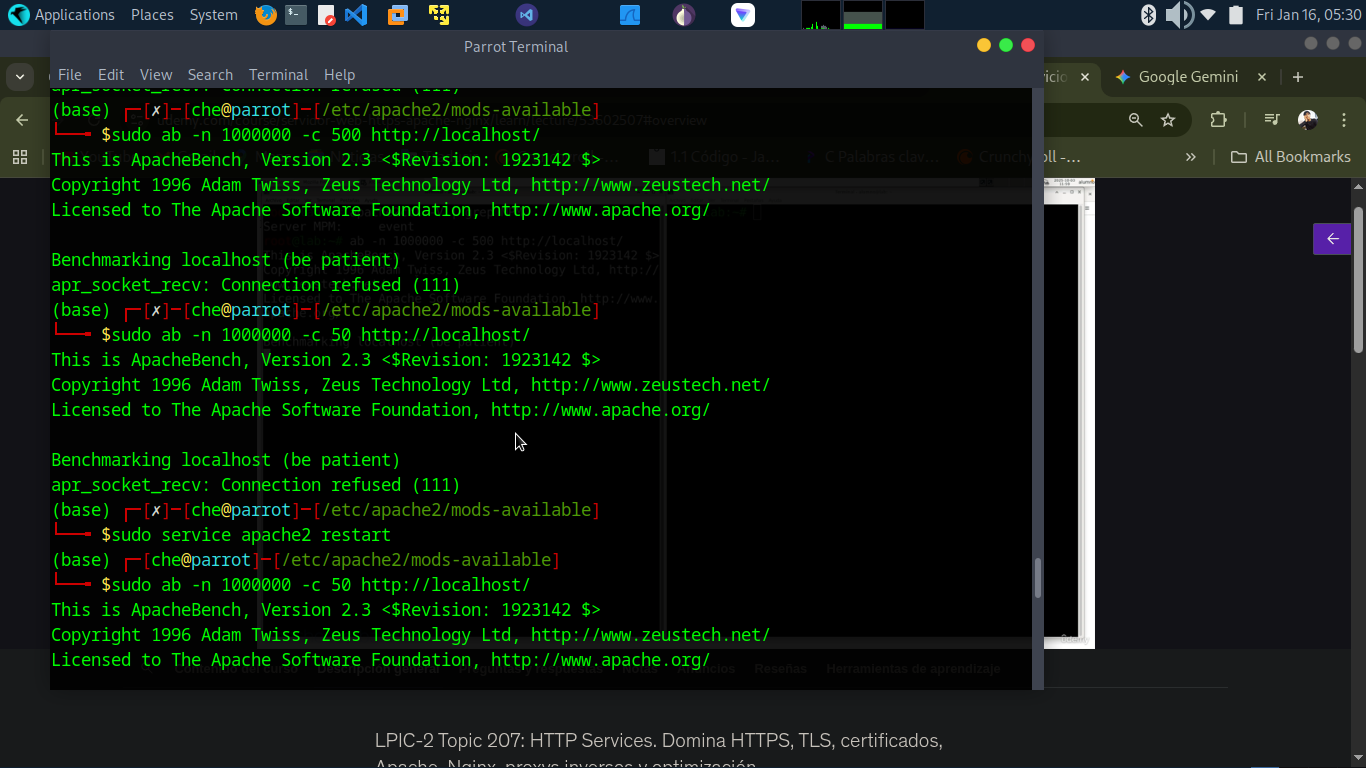

Aqui paso que me negaba las solicitudes, entonces le di en restart, asi se me dejo hacer el test

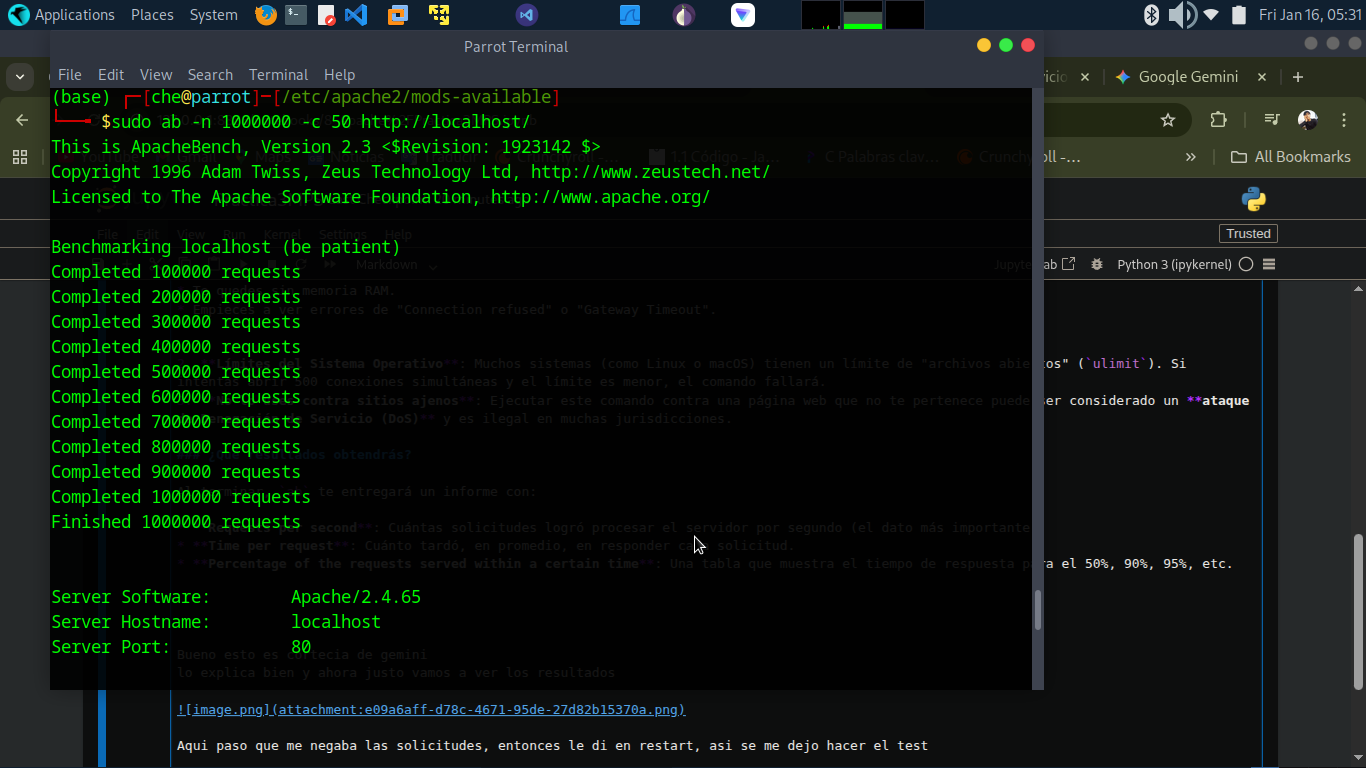
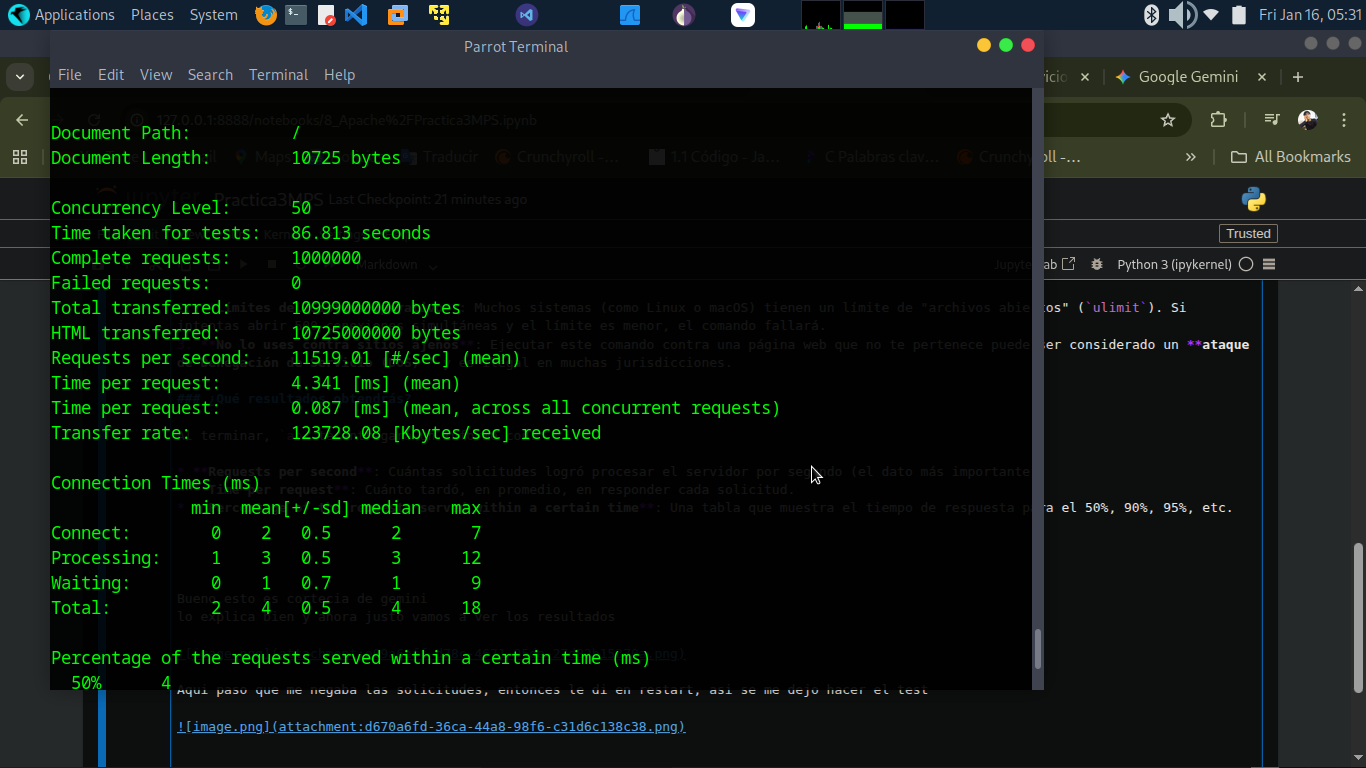
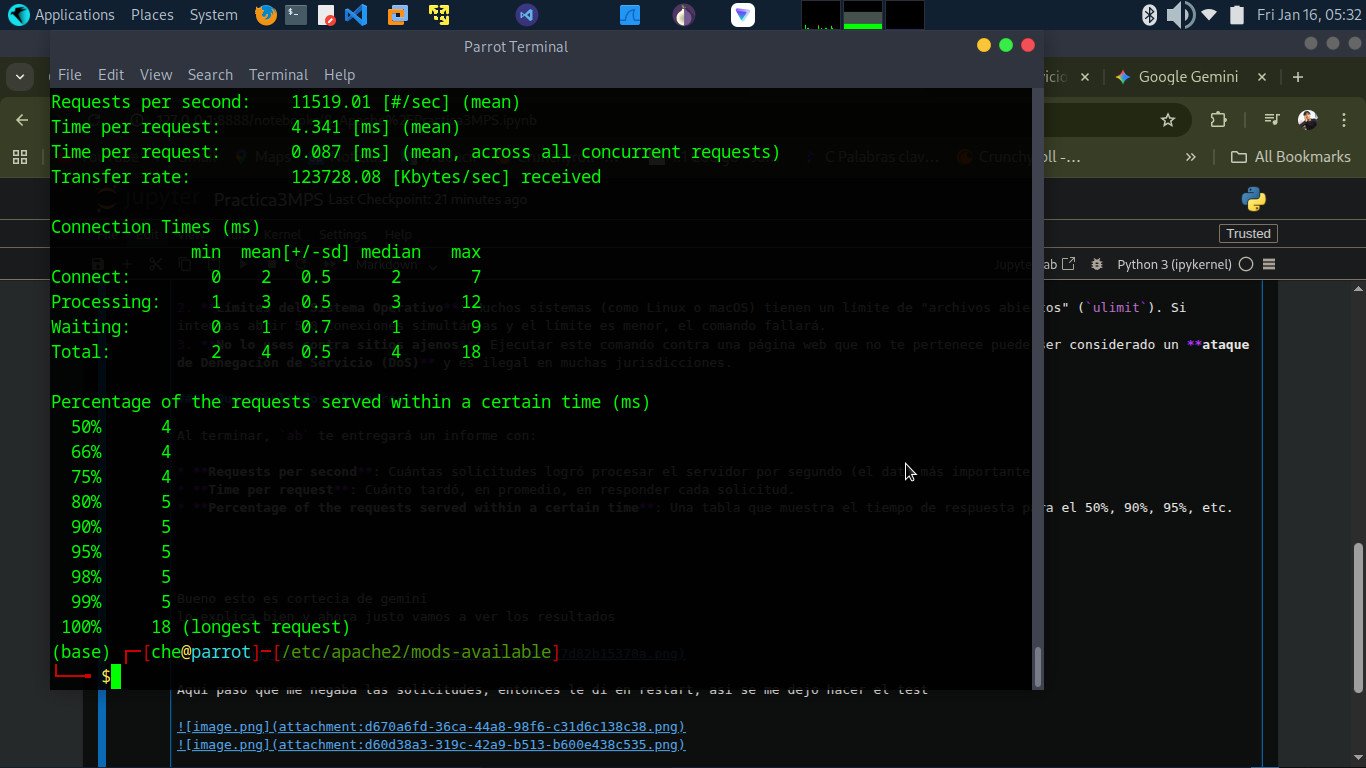




Mi computadora no es lo mas top, asi que mis resultados son estos 
Con la informacion que esta ahi y con la explicacion de gemini me parece que se entiende bien





Ahora provemos el prefork

In [ ]:
sudo a2dismod mpm_event
sudo a2enmod mpm_prefork
sudo service apache2 restart

queda asi
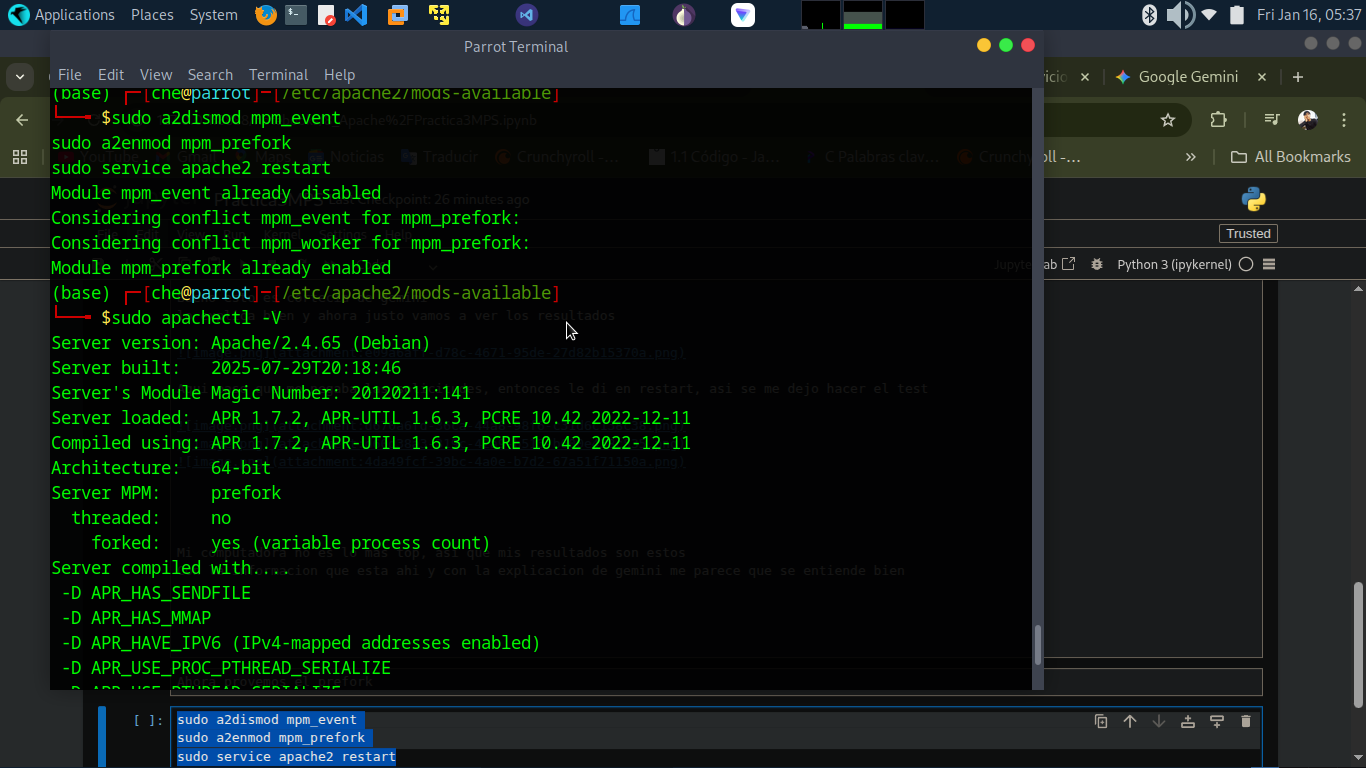

ahora hacemos la misma prueba 
Peeeeeeeeeeeeeeeeeeeeeeeeero estoy viendo que en concurrencia le puse 50 y era 500 
lo tendre que hacer de nuevo con event , chale


bueno aqui el resultado de prefork

asi se veia en el proceso 
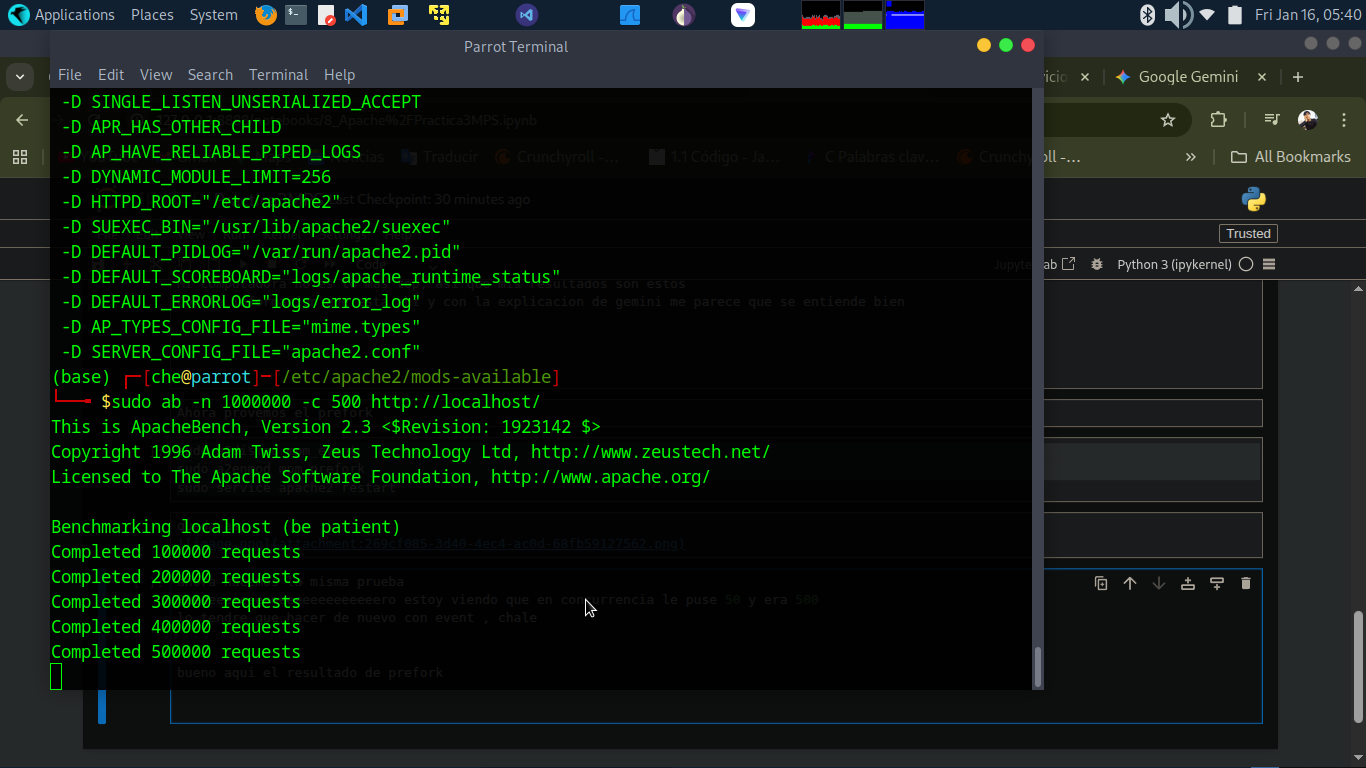


y aqui el final del test
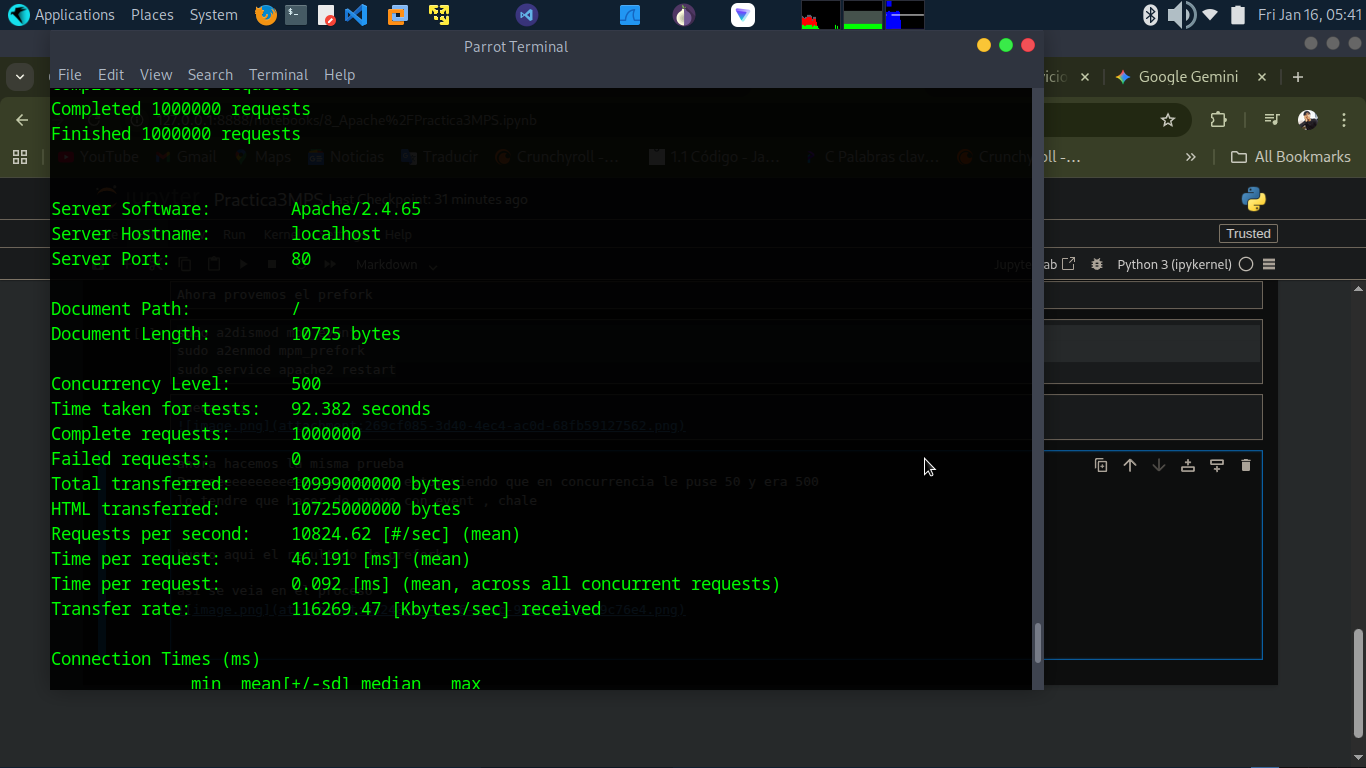
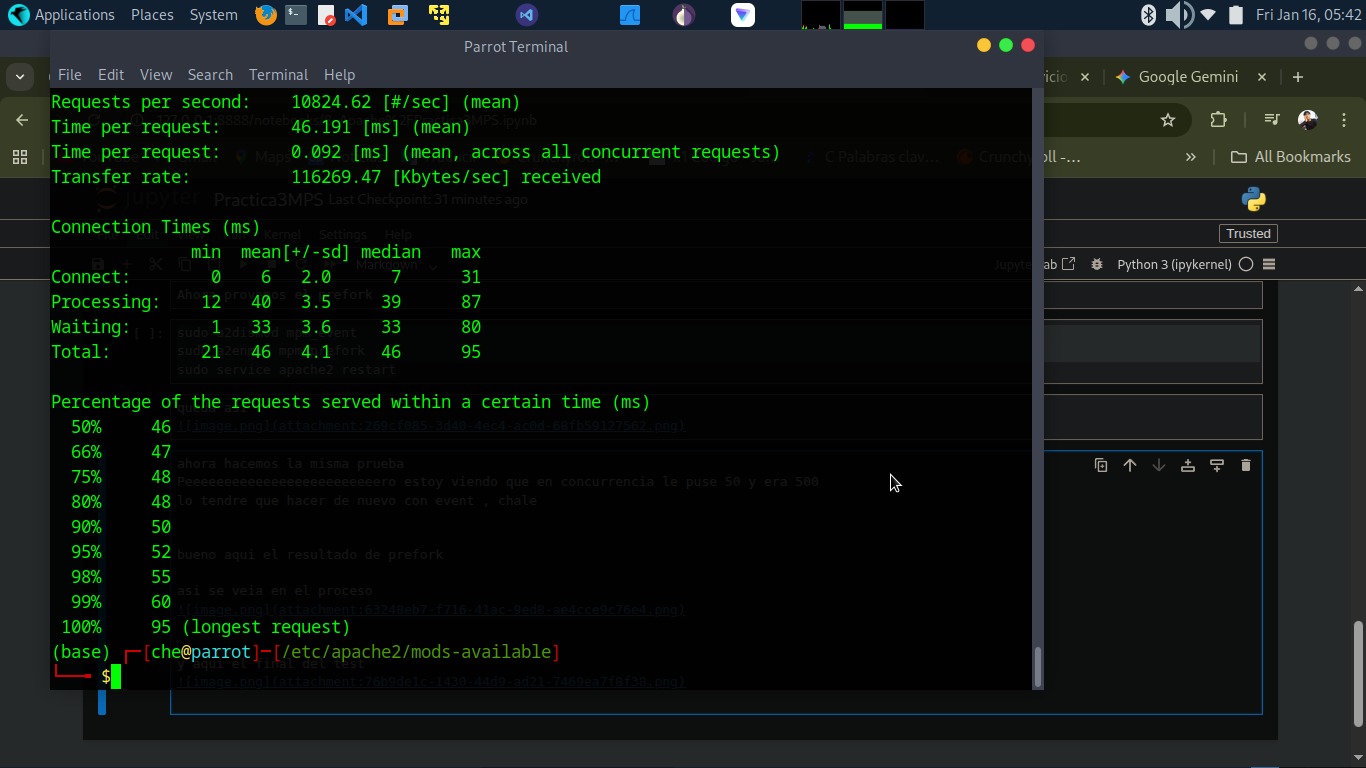


Ahora con event

asi se veia en el proceso 
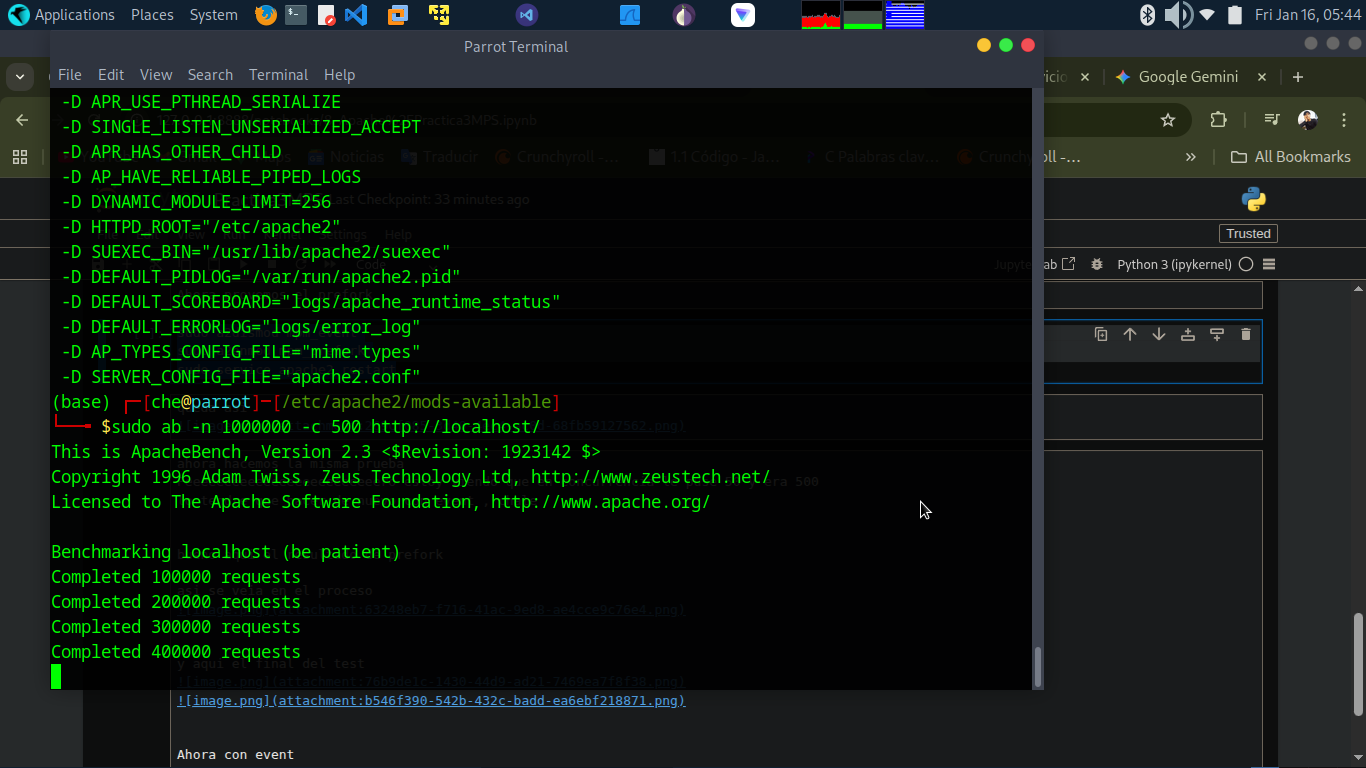


Este si tardo 
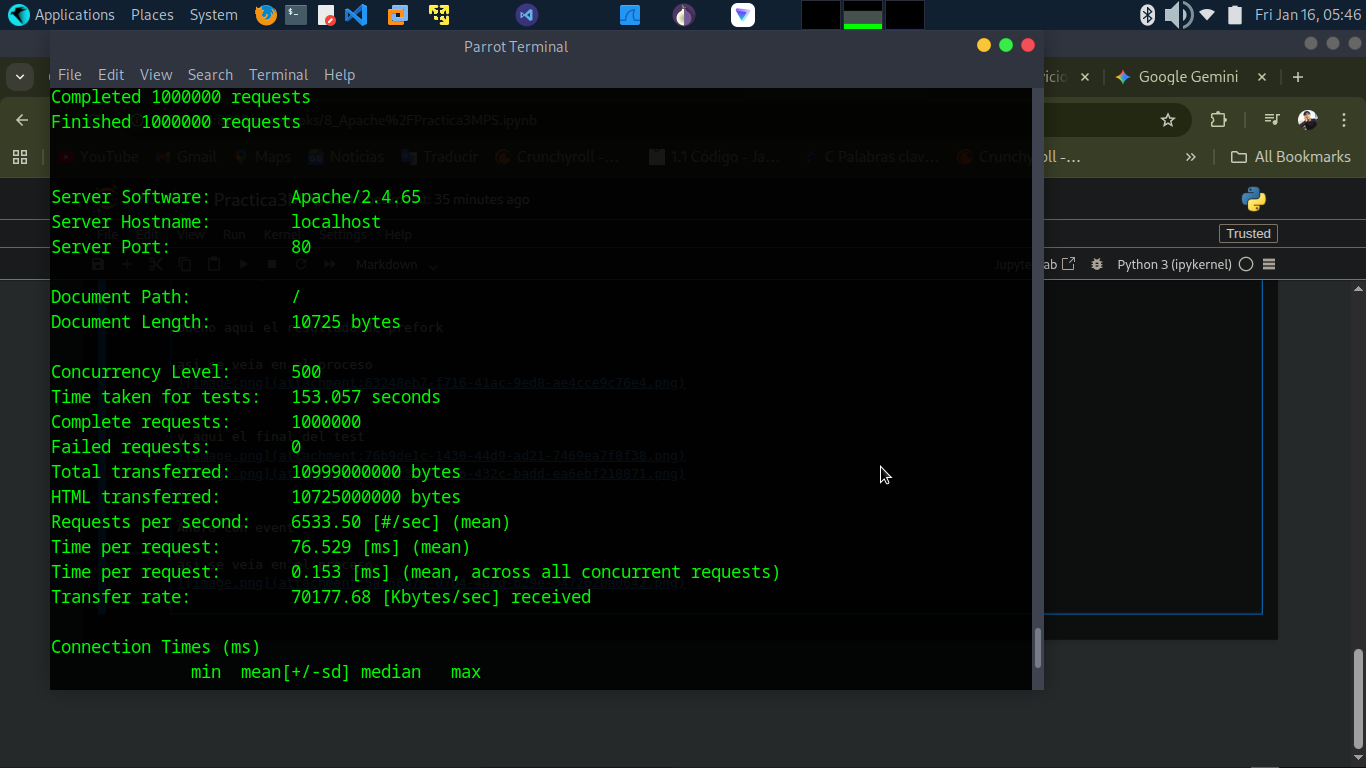
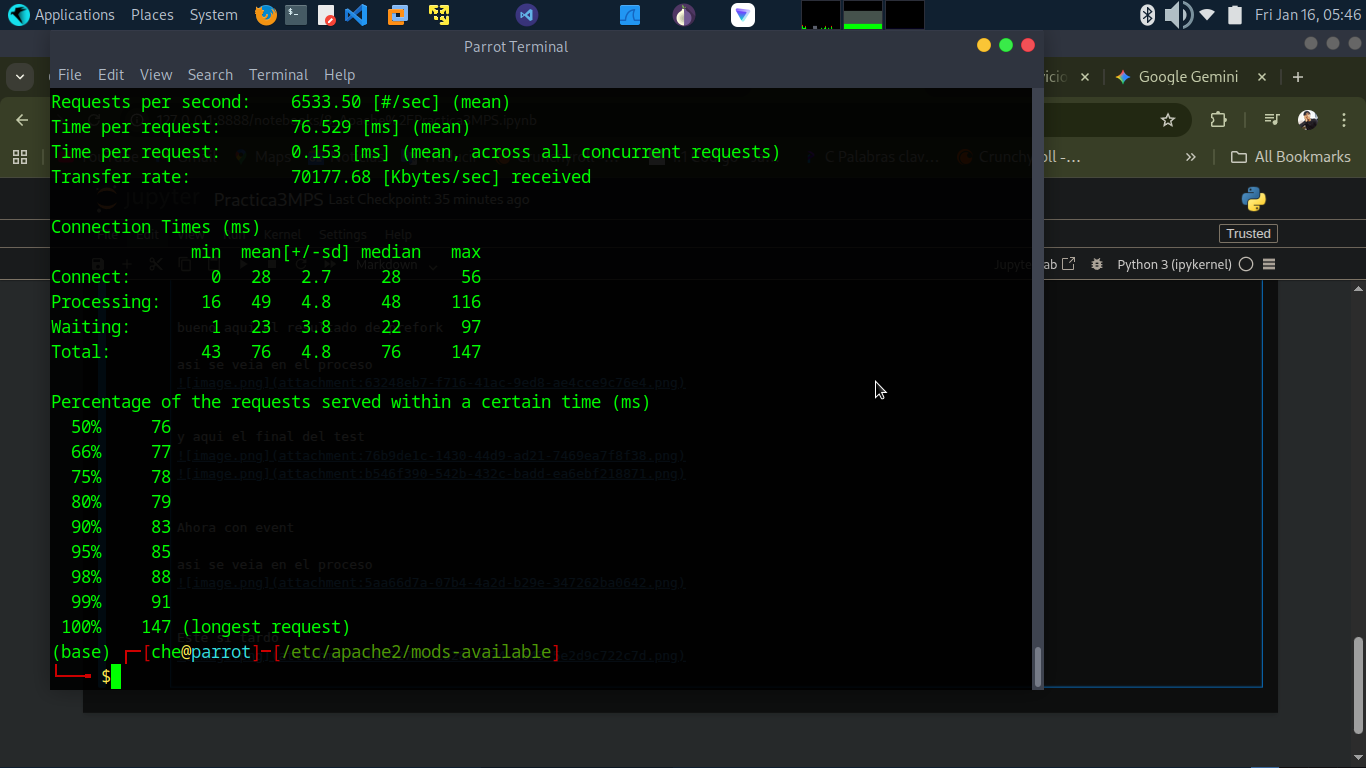



Que podemos notar  de event y prefork ?
Principalmente que si son muchas peticiones, event va a ser mas eficiente que prefork que es concurrente

Per si nosotros no le ponemos tantas peticiones y lo dejamos como en 1000 o 100
pues como es una carga ligera tendra un mejor desempeño prefork 

Hay que experimentar con estos mpm y pues cada mpm funciona bien en cierto contexo